In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#Read and Wrangle data
def wrangle(filepath):

    #read excel into a dataframe
    df = pd.read_excel(filepath)
    #drop missing values
    df.dropna(inplace=True)
    #drop high cardinality features
    drop_cols = [
        'eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 
        'attacktype1_txt', 'city','targtype1_txt', 'weaptype1_txt', 'nwound'
    ]
    #remove collinearity
    drop_cols.append("weaptype1")
    #drop columns
    df.drop(columns=drop_cols, inplace=True)
  

    return df

In [22]:
df = wrangle("Nigeria_terrorist_data.xlsx")
print("Shape:", df.shape)
df.info()

Shape: (4220, 9)
<class 'pandas.core.frame.DataFrame'>
Index: 4220 entries, 0 to 5997
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   provstate    4220 non-null   object 
 1   latitude     4220 non-null   float64
 2   longitude    4220 non-null   float64
 3   success      4220 non-null   int64  
 4   suicide      4220 non-null   int64  
 5   attacktype1  4220 non-null   int64  
 6   targtype1    4220 non-null   int64  
 7   gname        4220 non-null   object 
 8   nkill        4220 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 329.7+ KB


In [20]:
df.head()

,provstate,latitude,longitude,success,suicide,attacktype1,targtype1,gname,weaptype1,nkill
0,Lagos,6.452331,3.419044,1,0,1,2,Coup plotters,5,3.0
3,Lagos,6.618911,3.305532,1,0,1,2,Gang,13,1.0
4,Lagos,6.455641,3.429865,0,0,1,2,Unknown,5,0.0
5,Lagos,6.618911,3.305532,1,0,1,7,Unknown,5,1.0
6,Lagos,6.618911,3.305532,1,0,1,8,Unknown,5,3.0


<Axes: >

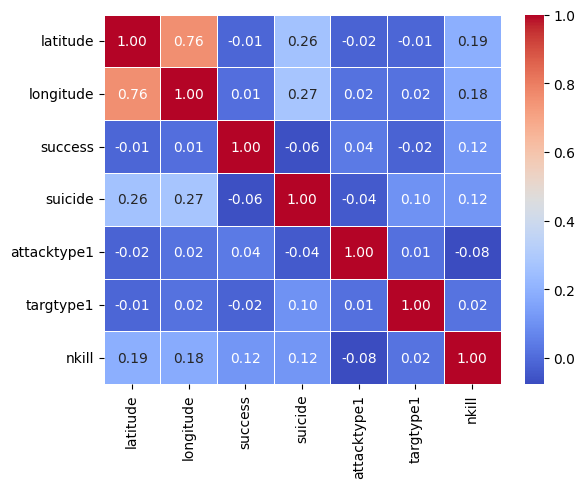

In [26]:
cor = df.corr(method="pearson", numeric_only=True)
#plt.boxplot(df["nkill"], vert=False);
import seaborn as sns
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


In [17]:
print(df["nkill"].corr(df["weaptype1"]))
print(df["nkill"].corr(df["attacktype1"]))


-0.04152514580835781
-0.07629605094224481
